<a href="https://colab.research.google.com/github/osamazafar980/Image-Enhancing-and-Edge-Detection/blob/master/Image_Enhancing_and_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing

In [0]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from skimage.color import rgb2gray
import copy
import math

Loading Image

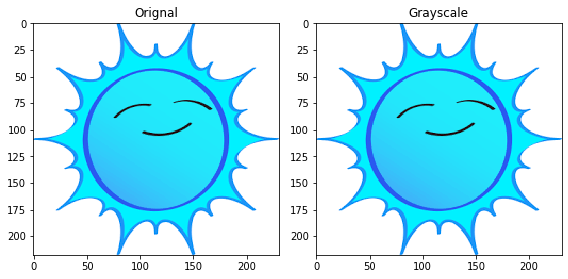

In [2]:
image = cv.imread('image.jpg')
grayscale = rgb2gray(image)
def plot(image):
  figure,axes = plt.subplots(1,2,figsize=(8,4))
  axes =axes.ravel()
  axes[0].imshow(image)
  axes[0].set_title("Orignal")
  axes[1].imshow(image,cmap=plt.cm.gray)
  axes[1].set_title("Grayscale")
  figure.tight_layout()
  plt.show
plot(image)

Enhancing Image

(218, 231)
(218, 231)


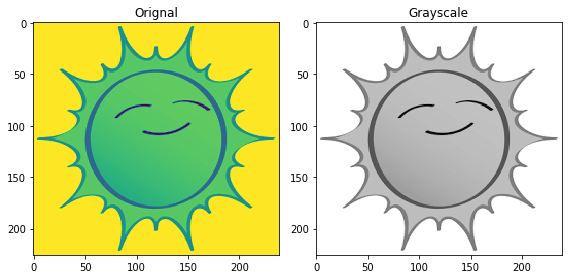

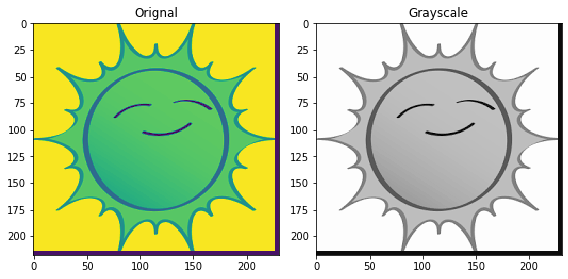

In [3]:
shape = grayscale.shape
print(shape)

def padding(img,size):
  newImage = np.pad(img,size,'constant',constant_values=1)
  plot(newImage)
  return newImage

#size of sharpning filter 3x3
filterSize=9 
size=math.floor(filterSize//2)
newImage=padding(grayscale,size)
sharpImage=np.ones(shape)

def sharpen(newImage,sharpImage):
  for row in range(size,shape[0]):
    for col in range(size,shape[1]):
      value=(newImage[row][col])*(20)
      mean=0
      for x in range(row-1,row+2):
        for y in range(col-1,col+2):
          mean=mean+newImage[x][y]
      mean=mean/9
      sharpIntensity=value-mean
      sharpImage[row-size][col-size]=sharpIntensity
  return sharpImage

sharpImage=sharpen(newImage,sharpImage)
plot(sharpImage)
print(sharpImage.shape)
    

Sharpening

0.0


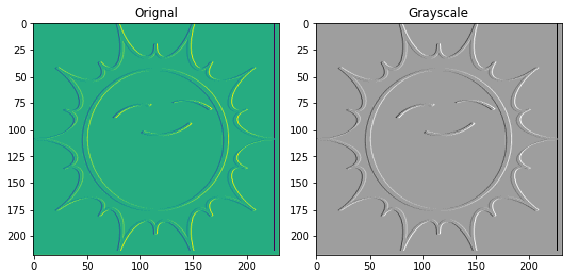

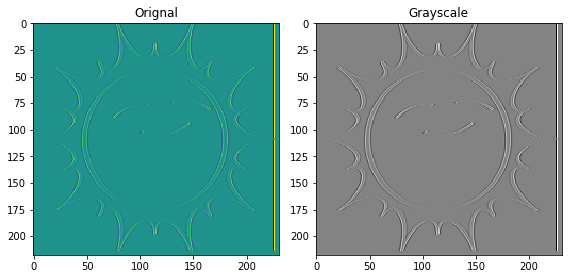

In [4]:
def Derivative(sharpImage):
  DerivativeImage=np.ones(shape)
  for row in range(0,shape[0]-1):
    for col in range(0,shape[1]-1):

      DerivativeImage[row][col]=round(sharpImage[row][col+1]-sharpImage[row][col])
  return DerivativeImage

firstDerivativeImage=Derivative(sharpImage)
plot(firstDerivativeImage)
print(firstDerivativeImage[0][0])
secondDerivativeImage=Derivative(firstDerivativeImage)
plot(secondDerivativeImage)


  